1.Використовуючи дані з файлу 'student_scores.csv' побудуйте модель простої регресії для знаходження залежності між значеннями тривалості навчання і середнього балу студентів.
Оцінити якість отриманої регресії.

In [21]:
import pandas as pd

# Завантаження даних з файлу
df = pd.read_csv('student_scores.csv')

df.columns = ['hours', 'scores']  # присвоєння імен ознакам

df

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# розділяємо дані на залежну (y) та незалежну (x) змінні
x = df['hours']
x_array = np.array(x).reshape(-1, 1)

y = df['scores']
y_array = np.array(y).reshape(-1, 1)

# розділяємо дані на тренувальну та тестову вибірки
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=0)

# створюємо модель лінійної регресії
model = LinearRegression()

# навчаємо модель на тренувальних даних
model.fit(x_train, y_train, sample_weight=None)

# зробимо передбачення на тестових даних
y_pred = model.predict(x_test)

# виведення результату фітингу моделі лінійної регресії на тестових даних
print('Predictions:', y_pred)

# оцінюємо якість моделі за допомогою метрик R2 та MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 scores:', r2)
print('Mean squared error:', mse)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Predictions: [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]
R2 scores: 0.9454906892105356
Mean squared error: 21.5987693072174
(20, 1)
(5, 1)
(20, 1)
(5, 1)


Значення R2, в діапазоні від 0 до 1, де значення 1 означає ідеальну прогнозуючу здатність моделі, а значення 0 означає, що модель не може пояснити варіацію відповідної залежної змінної.
MSE вимірює середньоквадратичну помилку передбачень моделі. Чим менше значення MSE, тим краще модель.

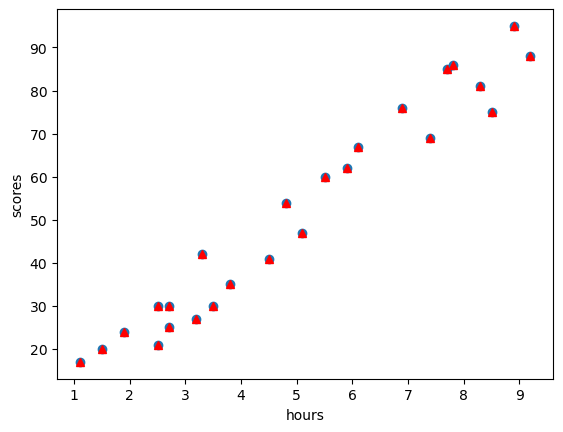

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x_array, y_array, 'r^')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

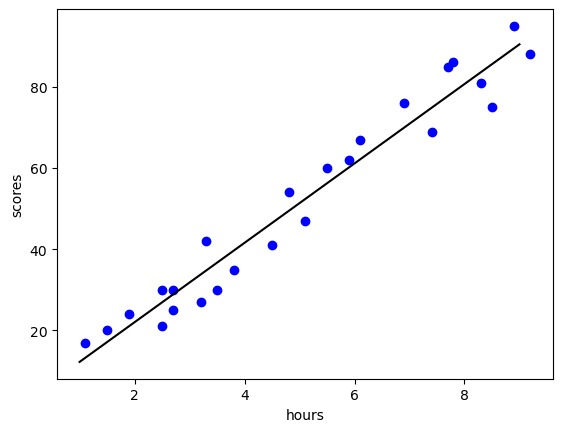

In [27]:
# побудова графіку
LinReg = LinearRegression().fit(df[['hours']], df['scores'])
b, m = LinReg.intercept_, LinReg.coef_
m = m[0]

plt.scatter(df.hours, df.scores, color='blue')
plt.plot(list(range(1, 10)), [m * x + b for x in range(1, 10)], color='black')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [32]:
# оцінюємо якість моделі за допомогою метрик R2 та MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# виведення оцінки якості моделі
print('R2 score:', r2)
print('MSE:', mse)

R2 score: 0.9454906892105356
MSE: 21.5987693072174


2. Використовуючи дані з файлу 'petrol_consumption.csv' побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами.
Оцінити якість отриманої регресії.

In [45]:
# імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# завантажуємо дані з файлу csv
df_petrol = pd.read_csv('petrol_consumption.csv')
df_petrol

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [49]:
# визначаємо ознаки та цільову змінну
X = df_petrol.iloc[:, :-1].values
y = df_petrol.iloc[:, -1].values

# розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# навчаємо модель множинної регресії на тренувальній вибірці
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# робимо передбачення на тестовій вибірці
y_pred = regressor.predict(X_test)

# обчислюємо коефіцієнт детермінації R² для оцінки якості моделі
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination R²: ', r2)

Coefficient of determination R²:  0.2036193241012162


Значення коефіцієнта детермінації R² дорівнює 0.2036, що означає, що наша модель пояснює лише 20.36% змінності споживання бензину.
Це досить низький показник, що свідчить про те, що модель не є дуже ефективною для передбачення споживання бензину на основі факторів, використовуваних у дослідженні.

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 4666.34
Mean Absolute Error: 56.82
Root Mean Squared Error: 68.31


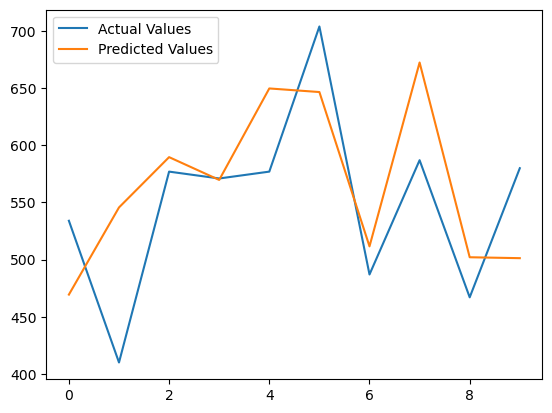

In [48]:
# Візуалізуємо дані та регресію
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()